# Clustering Mall Customer Data with Unsupervised Learning Techniques

## DTSA 5510 Final Project

## Objective: 

#### The objective for this project is find marketing insights using customer data with unsupervised learning models

## Data: Customer Segmentation Dataset

You are owning a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

We want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

## Goals 

#### * Perform exploratory data analysis 
#### * Achieve clustering using machine learning algorithm (KMeans Clustering) in Python
#### * Summarize our findings. 


Data: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis 

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape

(200, 5)

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().values.any() #no missing values

False

### Visualizations

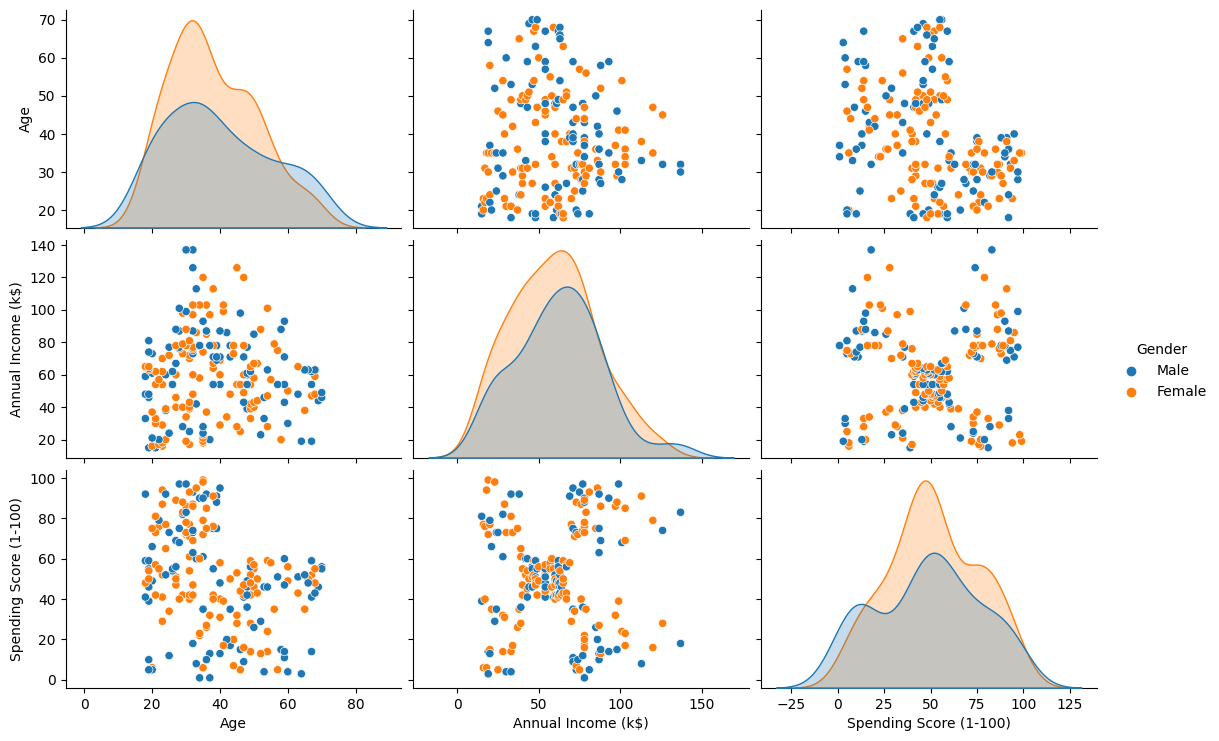

In [8]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

#### Above we created a pairplot looking at the labels we have in our data set split by gender. 

#### We can see from the pairplot that gender has no direct relation to segmenting customers so we will not be using it going forward. 

#### What labels will make the best cluster?

My predictions based on this plot is that annual income and spending score will be the best. we can see some clear clustering on those plots and I believe our KMeans model will have an easier time clustering those two labels. 

Text(0.5, 1.0, 'Age Density')

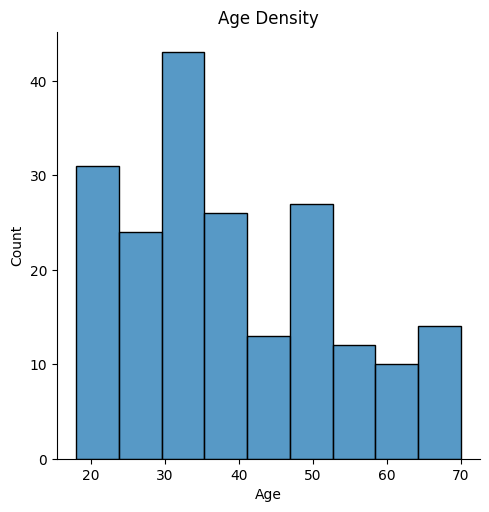

In [9]:
# plot age
sns.displot(df, x="Age")
plt.title("Age Density")

In the plot above we see that the age is distributed higher in the younger ages than older. 

Text(0.5, 1.0, 'Income Density')

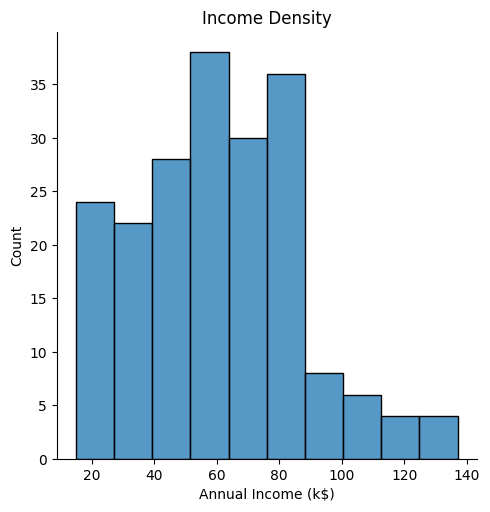

In [10]:
sns.displot(df, x="Annual Income (k$)")
plt.title("Income Density")

In the plot above we see that annual income density is highest in the 60-90k range. This data set is made up for learning purposes so we cannot relate it to a time or place. 

Text(0.5, 1.0, 'Spending Score Density')

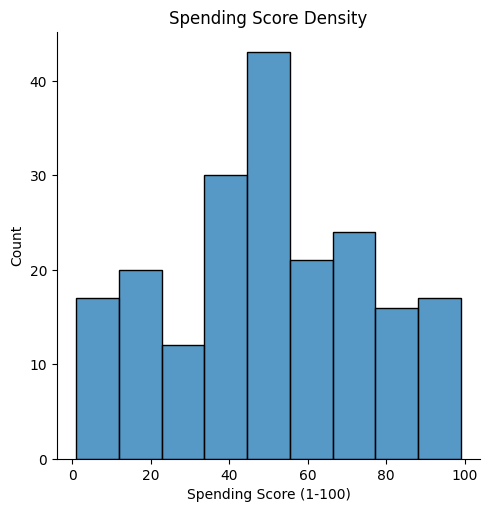

In [11]:
# plot Spending Score
sns.displot(df, x="Spending Score (1-100)")
plt.title("Spending Score Density")

 Spending Score is something you assign to the customer based on defined parameters like customer behavior and purchasing data. A customer with a higher spending score is more likley to purchase items 

In the plot above, we see that customers with a spending score of ~50 have the highest density. In this data set the number of customers with really low spending scores (0-10) and really high spending scores (90-100) is relatively the same. 

# Build Clustering Model 

#### What is unsupervised learning?

The goal of this project is to build an unsupervised clustering model using customer mall data. Unsupervised learning is a machine learning technique that uses algorithms to learn patterns and relationships in unlabeled data. One of these algorithms is known as clustering. 

#### What is clustering?

Clustering is grouping unlabeled data into clusters based on similarities or differences. To help us cluster this data we will be using Sklearn's KMeans clustering algorithm. SKlearn KMeans has two options for Algorithms. Elkan and Lloyd.   


#### Elkan vs Lloyd Algorithm

The classical EM-style algorithm is "lloyd". The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality.However it’s more memory intensive due to the allocation of an extra array of shape. For this project we will be using the "lloyd" algorithm. 

# Clustering Age vs Spending Score

We will first look at clustering Age vs Spending score. Based on the visualizations, I do not expect this to have clear clusters as the data was very spread out. 

In [12]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') ) 
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
    
# Inertia: Sum of distances of samples to their closest cluster center

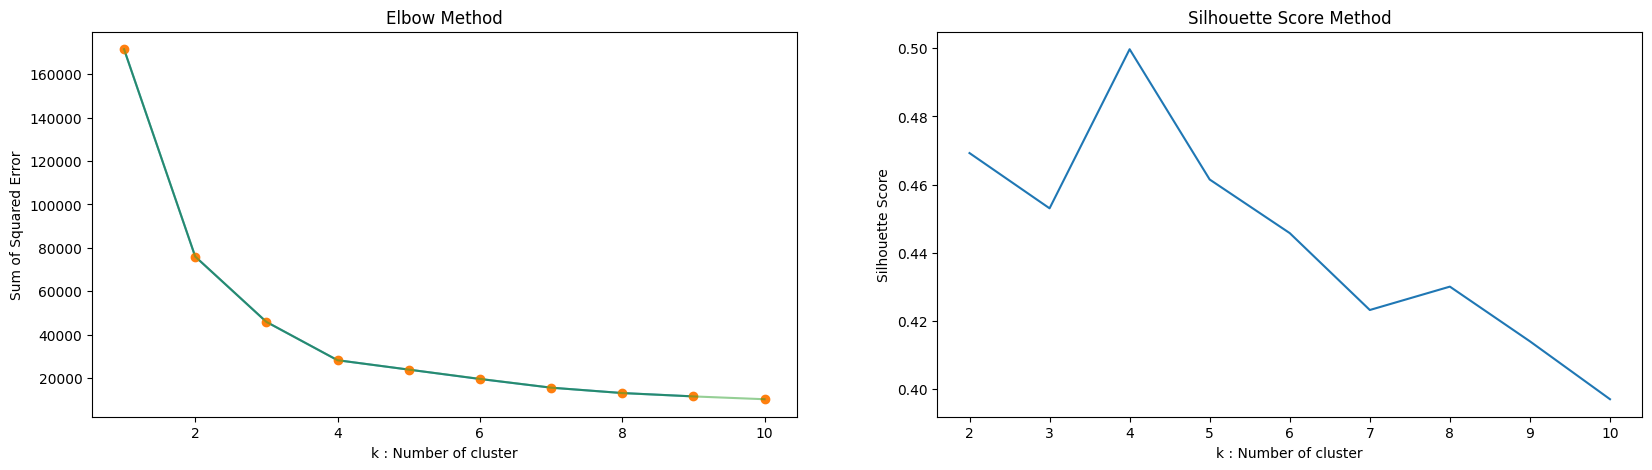

In [13]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(X1)
    labels = kmeans.labels_
    sil.append(silhouette_score(X1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

# Elbow Method

The elbow method is a visual technique used to determine the optimal number of clusters in a dataset.
The elbow method works by plotting the explained variance or within-cluster-sum-of-square (WCSS) values against the number of clusters. The optimal number of clusters is the point at which the graph forms an elbow, where the rate of variance decreases sharply and levels off. 

While the idea of the elbow method sounds simple, it can be unreliable and subjective. This is because the scale of the axes is arbitrary, making the concept of an angle not well-defined. Even on uniform random data, the curve produces an "elbow". Some say that other methods, like Silhouette score method, give better results


# Silhouette Score Method
This silhouette score is a numerical value that measures how well a data point fits into its cluster and how separated it is from other clusters. It's a metric used to evaluate the quality of a clustering algorithm and can 
determine the optimal number of clusters, validate the number of clusters in a clustering algorithm and find the best value of k for a clustering algorithm.

The silhouette score is calculated by averaging the silhouette coefficient for each sample. The silhouette coefficient is the difference between the average intra-cluster distance and the mean nearest-cluster distance, normalized by the maximum value. 
The silhouette score is most effective when the clusters are convex-shaped, and may not work well if the clusters have irregular shapes or sizes.

#### What is a good or bad score? 

* The best value is 1 and the worst value is -1. 
* Values near 0 indicate overlapping clusters. 
* Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
* Scores greater than 0.25 are weak
* Scores greater than .5 are reasonable
* And anything above .7 is strong

But with increasing dimensionality of the data,it becomes difficult to achieve such high values because of the curse of dimensionality, as the distances become more similar. 

# Elbow vs Silhouette

I find that the Silhouette score method is a better indicator of what cluster number to use for our KNN algorithm. I will still be visualizing both to show how it may differ with different labels. 

In [14]:
algorithm = (KMeans(n_clusters = 4,init='k-means++', n_init = 10 ,max_iter=300, #4 clusters
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') ) #elkan
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [15]:
silhouette_score(X1, algorithm.fit_predict(X1))

0.49973941540141753

#### A silhouette score of .499 is very close to the .5 threshold of being reasonable. However, I was expecting much worse. When a score is low, it indicates that a clustering configuration may be poor, with overlapping clusters or points that are not well-assigned to their clusters

In [16]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

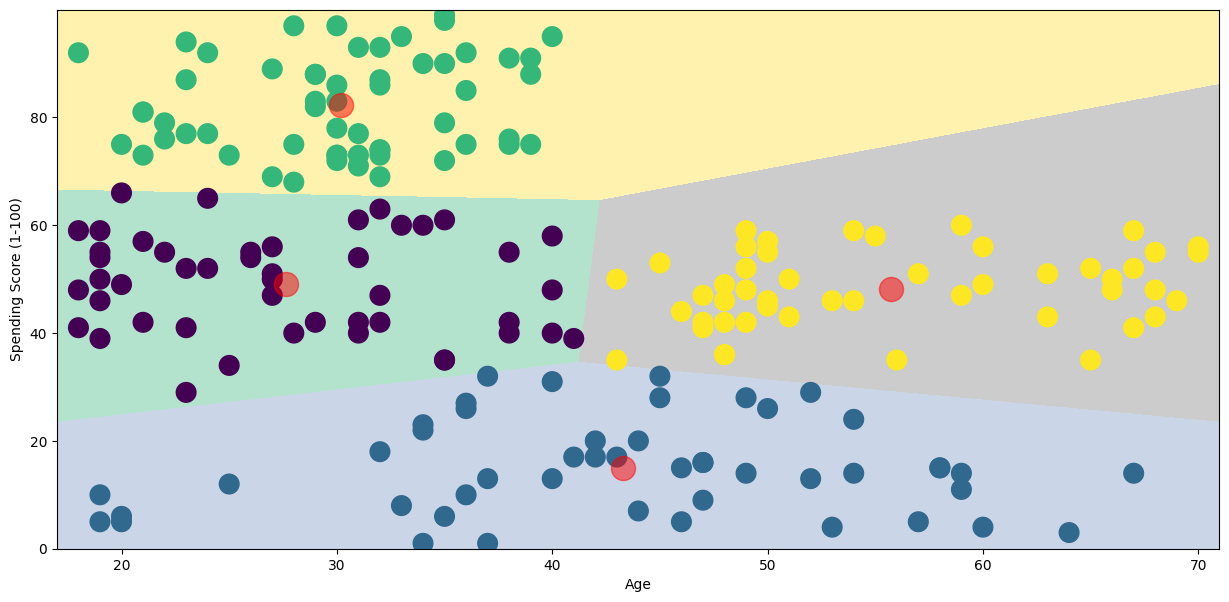

In [17]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

The clusters are suprisingly better than I thought. The four different colors represent the 4 clusters that we chose for our KMeans algorithm. Looking at the clustering of dots, we see many dots on the edge of their clusters and this could contribute to the low silhouette score. 

The red dots are centroids. Centroids are the center of a cluster, or the average of all the points in the cluster. It can also be defined as the most represented data object in the cluster.

The clusters are groups of objects that share common characteristics and are distinct from other groups. So they can be thought of as splitting our customer base into 4 different categories. The top one being high spending score but low age. The middle two being mid spending score but low and high age respectively and the bottom cluster being low spending score for all ages. 

# Clustering Annual Income vs Spending Score

Next we will look at Annual income vs Spending Score. I expect this to have the most clear clustering out of all

In [18]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

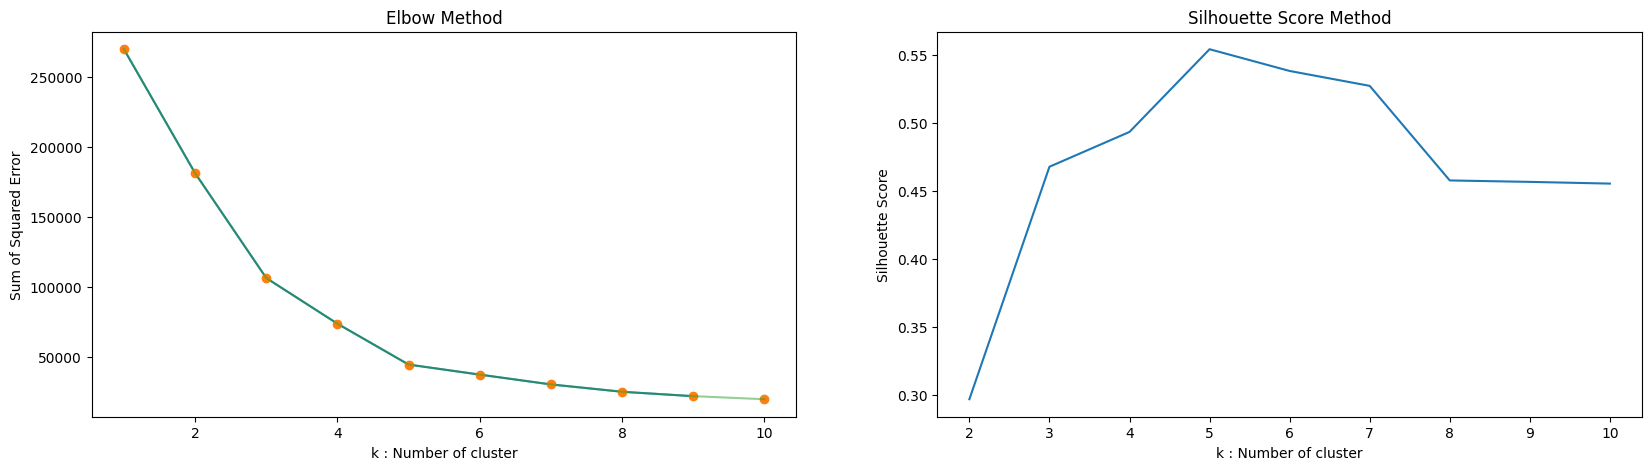

In [19]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(X2)
    labels = kmeans.labels_
    sil.append(silhouette_score(X2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

Above we see that from the elbow method a cluster of roughly 5 would be a good choice and this is confirmed using our silhouette score method plot. 

In [20]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [21]:
#checking the silhouette score to confirm its the best cluster number
silhouette_score(X2, algorithm.fit_predict(X2))

0.553931997444648

#### A silhouette score of .55 is greater than .5 which tells us that this score is reasonable. 

In [22]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

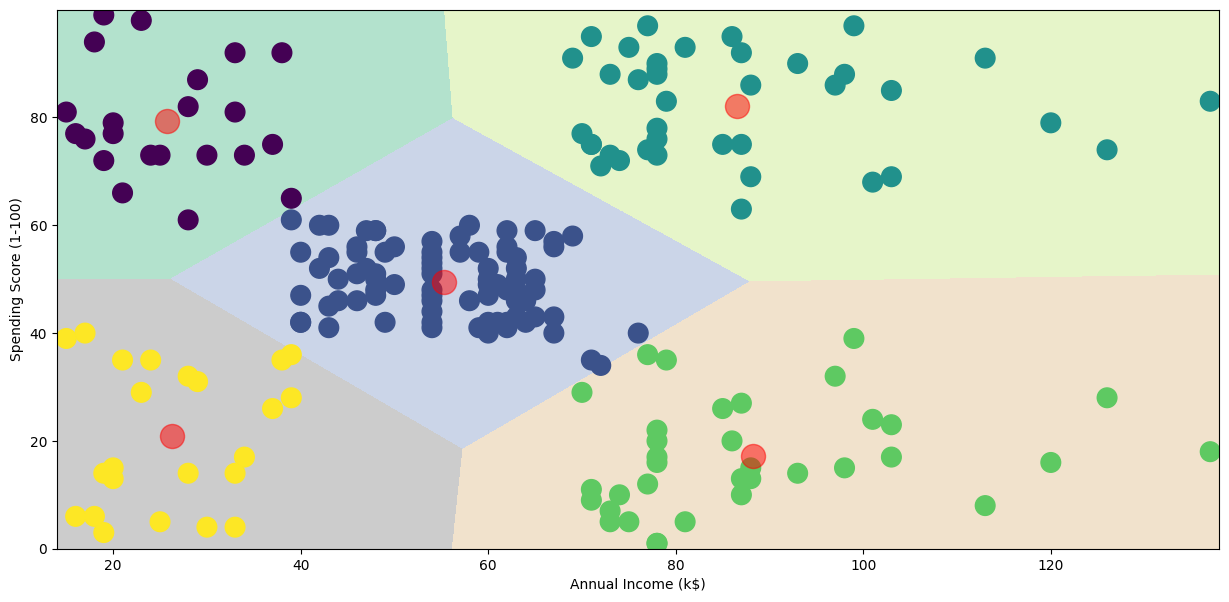

In [23]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

Above we have our a scatter plot of spending score vs annual income. Recall that our prediction for best cluster was going to be spending score vs annual income. So far that prediction is looking to be correct. With a silhoutte score of .55, the number of clusters is reasonable and there isnt too much overlap within the clusters compared to other plots. 


We can see that our algorithm has successfully split our data into 5 different clusters. The yellow dots correspond to a low spending score and low annual income, light green is low spending score/high income, blue is middle spending score/middle income, purple is high spending score low income, green is high spending score/high income. 

We see a large grouping in the middle cluster and this tells us that the large majority of our customers are middle class in terms of income and ~50 spending score. 

# Clustering Age , Annual Income and Spending Score

Finally, we will look at 3D modeling. This cluster will take into account age, annual income and spending score. 

In [24]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

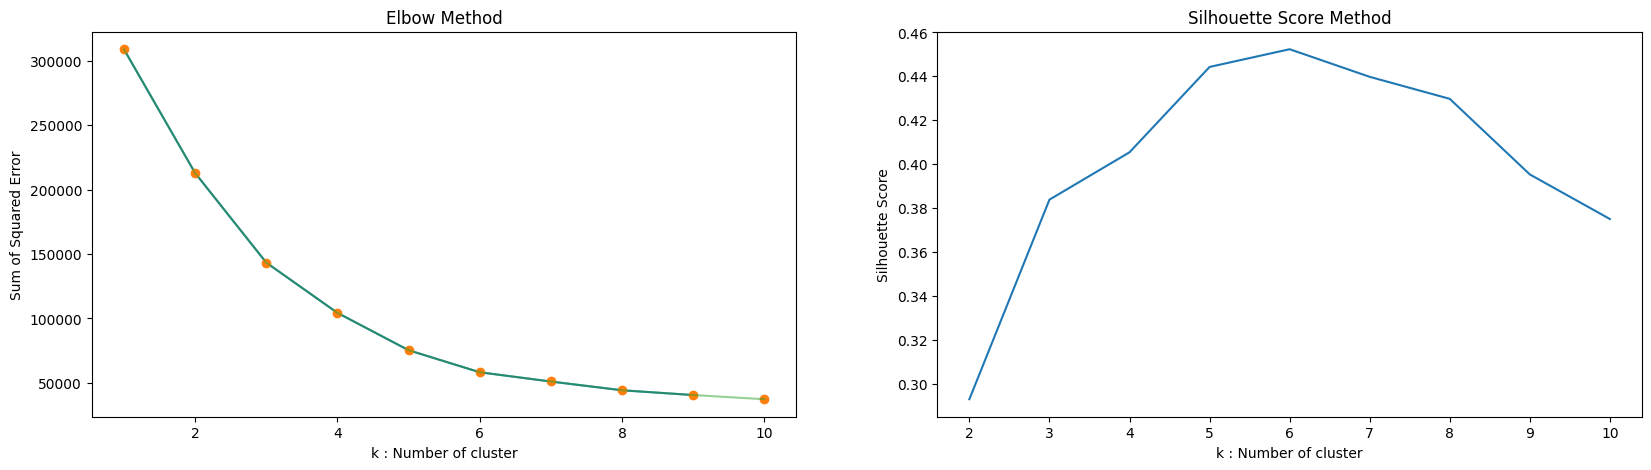

In [25]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X3)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(X3)
    labels = kmeans.labels_
    sil.append(silhouette_score(X3, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

From the plots its hard to tell what cluster is the best from the elbow method but from the silhouette score method a cluster number of 6 is the best. 

In [26]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [27]:
silhouette_score(X3, algorithm.fit_predict(X3))

0.4523443947724053

A silhouette score of .45 is not great. Its below the .5 threshold of being reasonable. But there is no other cluster number that gives us a higher score. I believe this low score is from the slight overlapping clusters like we have seen in the past visualizations. 

#### This is our lowest score of the project and a good example of how increased dimensionality can reduce the silhouette score. 

In [28]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)

In [29]:
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In our 3D cluster above, we clearly see 6 clusters. Visualizing clusters in 3D is beneficial it can provide us with a better understanding of complex data and the clustering formation

In this 3D visualization, the clusters are better defined and rotating the clusters shows us how close these clusters are and how some clusters like the magenta and navy colored are heavily overlapped. 

# Conclusions

This dataset is great for understanding how to deal with unsupervised learning problems. It presents the opportunity to work on a Business Problem that can be utilized for creating varied strategies to boost sales.

The goal of this project was to successfully implement a KMeans algorithm to cluster customer data. We were able to successfully implement to the expected results. 

As we predicted, the segmented profile with the best clusters and silhouette score was annual income and spending score. Remember that spending score is affected by customer behavior and purchasing data. A customer with a higher spending score is more likley to purchase items. The KMeans algorithm had the best silhoutte score for spending score vs income because the data had better clustering than other labels. 


# How can we apply this project to the real world?

I believe this kind of project has good traction from a marketing perspective. This kind of work can give us a better idea of what kind of customers are spending money at malls and how we can target those consumers. For example, sales at certain shops that fit spending scores of customers. Or Target ads for luxuy goods for high income customers. 

### Looking at our cluster of Annual Income vs Spending Score:

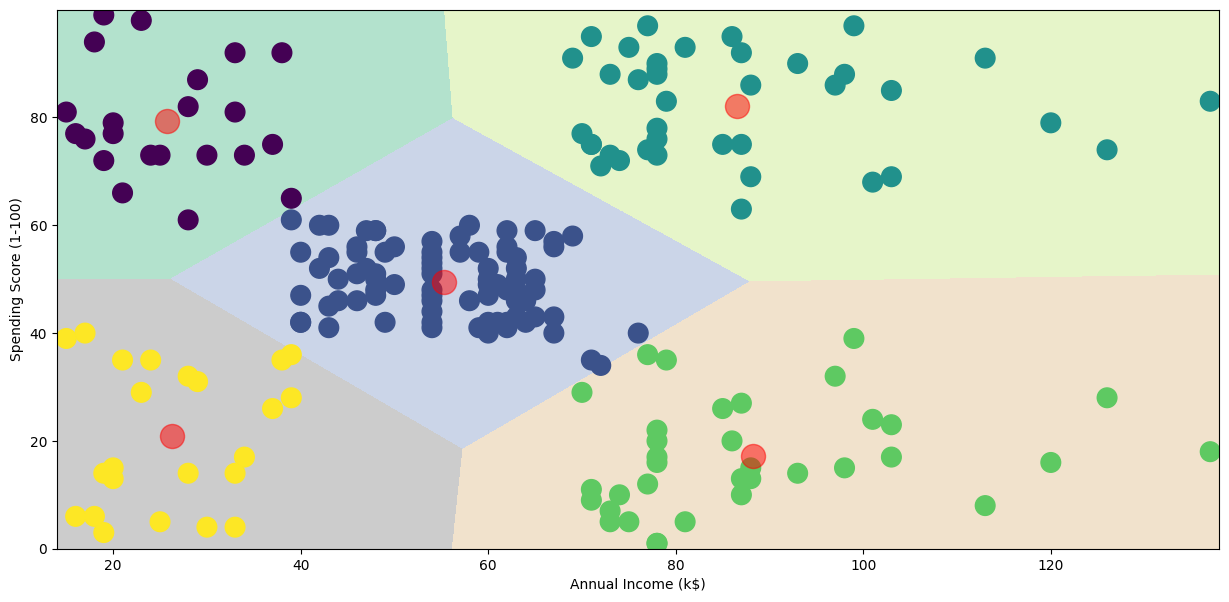

In [32]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

# How can we intrepret this graph for marketing purposes?

#### High spenders, high income

Our purple cluster, top left, are generally pretty high spenders and they may have purchased high value items like luxury goods. Based on their low annual income, marketing ads could potentially be BNPY (buy now pay later), sportswear luxury drops, etc.

Our dark green cluster, top right, are people with a high spending score and high income, these are the customers that have the highest potential to generate revenue and you should use this to your advantage. Can also be targeted with high luxury items. 

### Medium spenders, medium income

Our blue cluster, middle, could be targeted with ads from big retailers as the bulk of their customers are probably from this cluster. 

#### Low spenders, high income

Our light green cluster, bottom right, are the ones that are a little harder to convince for purchases. Since they don’t spend that much but make a decent amount.


#### Low spenders, low income

Our yellow cluster, bottom left, could be targeted with discount codes, but depending on the brand, we may not want  to target these group of customers as much due to their low spend potential.

### What can we do to improve?

We learned that is quite easy to implement clustering algorithms to customer data and its possible to gather real insights from the results of this exercise. But I would be interested to see how this project goes with bigger and more complex data. While this project did suffer from bad silhouette scores, increasing the complexity could make things worse. However, depending on the correlation of newer labels, finding higher silhoutte scores and better clustering is a possibility. I would also like to research more complex algorithms that might tackle this problem more accurately since we used a simple Lloyd algorithm from KMeans. 

# Thank you! 
